
# KerasでMNIST
## softmaxのみ

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, CSVLogger
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
batch_size = 50   # バッチサイズ
num_classes = 10  # 分類クラス数　数字認識なので10
epochs = 5 #  学習の繰り返し回数　

# MNISTデータの読み込み
```
(images, labels), (timages, tlabels) = mnist.load_data()
images = images.reshape(60000, 784).astype('float32')
timages = timages.reshape(10000, 784).astype('float32')
images /= 255  # tensorflow と違って keras で読み込んだ MNISTデータは画素が１バイトの整数表現されている
timages /= 255
labels = keras.utils.to_categorica(labels,10)  # keras の MNISTのラベルデータは整数
tlabels = keras.utils.to_categorica(tlabels,10)```

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
images = mnist.train.images
labels = mnist.train.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# モデル定義


In [5]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 学習の定義

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

Optimizerについては
https://keras.io/ja/optimizers/

In [8]:
es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1)
csv_logger = CSVLogger('training.log')
hist = model.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1, # 1 % は検証用に利用する
                 callbacks=[es, csv_logger,tb_cb])

Train on 49500 samples, validate on 5500 samples
Epoch 1/5
49500/49500 [==============================] - 3s - loss: 0.5594 - acc: 0.8578 - val_loss: 0.2862 - val_acc: 0.9253
Epoch 2/5
49500/49500 [==============================] - 3s - loss: 0.3345 - acc: 0.9072 - val_loss: 0.2532 - val_acc: 0.9300
Epoch 3/5
49500/49500 [==============================] - 3s - loss: 0.3051 - acc: 0.9143 - val_loss: 0.2400 - val_acc: 0.9322
Epoch 4/5
49500/49500 [==============================] - 3s - loss: 0.2913 - acc: 0.9184 - val_loss: 0.2311 - val_acc: 0.9364
Epoch 5/5
49500/49500 [==============================] - 3s - loss: 0.2826 - acc: 0.9207 - val_loss: 0.2282 - val_acc: 0.9345


test loss: 0.271540608731
test acc: 0.9243


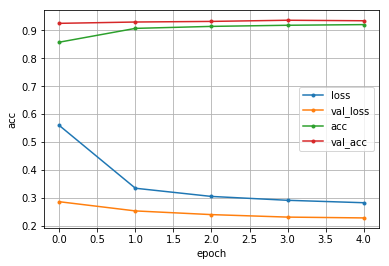

In [9]:
timages = mnist.test.images
tlabels = mnist.test.labels# evaluate model
score = model.evaluate(timages, tlabels, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()